In [400]:
## Se demora a lo mucho: 20 seg en correr
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import time

#Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Modelos utilizados
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metricas para seleccionar
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.decomposition import PCA

# Warinings filtrados y tiempo tomado
warnings.filterwarnings('ignore')
start_time = time.time()



<div style="text-align: center;""></a><img src="https://i.ibb.co/XFL6rby/portada.png" alt="portada" border="0"></a>

#### Recuperando los datos

In [401]:
VGSaleswoRating = "https://fernanda-bley.github.io/mineria%20/VGSales.csv"
VGSaleswRating = "https://fernanda-bley.github.io/mineria%20/VideoGameSaleswRatings.csv"

VGSales =  pd.read_csv(VGSaleswoRating)
VGSalesRatings =  pd.read_csv(VGSaleswRating)


#### Limpieza de datos

In [402]:
#Droppeamos los NaN en nuestro dataset de ratings
VGSalesRatings_noNaN = VGSalesRatings.dropna()
#Creamos un nuevo dataset quedandonos con los datos que no estan en el primer DataSet
CleanData = VGSalesRatings_noNaN[['Name', 'Critic_Score', 'Critic_Count','User_Score', 'User_Count', 'Developer','Rating']]

#Unimos los dataset con el mismo nombre
Merge = pd.merge(CleanData, VGSales, on = 'Name')
#Revisamos los NaN que tienen
Merge.isna().sum()

#Como los NaN se pueden arreglar, reemplazamos que los publishers desconocidos son Unknown y los años desconocidos por 0

Final = Merge.assign(Publisher=Merge['Publisher'].fillna('Unknown'))
Final = Final.assign(Year=Merge['Year'].fillna(0))

In [403]:
Final

,Name,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,76.0,51.0,8,322.0,Nintendo,E,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Mario Kart Wii,82.0,73.0,8.3,709.0,Nintendo,E,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,Wii Sports Resort,80.0,73.0,8,192.0,Nintendo,E,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,New Super Mario Bros.,89.0,65.0,8.5,431.0,Nintendo,E,7,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,Wii Play,58.0,41.0,6.6,129.0,Nintendo,E,8,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17431,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,3267,PS3,2014.0,Action,Konami Digital Entertainment,0.14,0.14,0.27,0.06,0.62
17432,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,6120,XOne,2014.0,Action,Konami Digital Entertainment,0.15,0.11,0.00,0.02,0.28
17433,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,8755,X360,2014.0,Action,Konami Digital Entertainment,0.07,0.06,0.01,0.01,0.15
17434,Breach,61.0,12.0,5.8,43.0,Atomic Games,T,16588,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


#### Analisis previo de datos

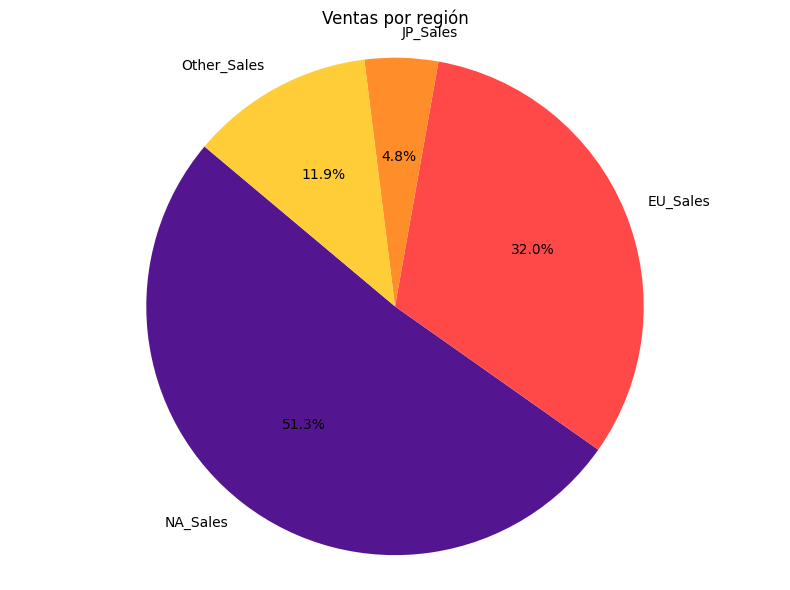

In [404]:
# Sum the sales for each region

sales_summary = {

    'NA_Sales': Final['NA_Sales'].sum(),

    'EU_Sales': Final['EU_Sales'].sum(),

    'JP_Sales': Final['JP_Sales'].sum(),

    'Other_Sales': Final['Other_Sales'].sum(),

}


# Convert sales_summary to DataFrame for easier manipulation

sales_df = pd.DataFrame(sales_summary, index=[0])


# Define colors for each region

colors = {

    'NA_Sales': '#541690',    # North America

    'EU_Sales': '#FF4949',   # Europe

    'JP_Sales': '#FF8D29',     # Japan

    'Other_Sales': '#FFCD38' # Other regions

}


plt.figure(figsize=(8, 6))  # Set the figure size

plt.pie(sales_summary.values(), labels=sales_summary.keys(), colors=[colors[key] for key in sales_summary.keys()],

        autopct='%1.1f%%', startangle=140)


plt.title('Ventas por región')

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

plt.tight_layout()  # Adjust layout to prevent clipping of ylabel

plt.show()

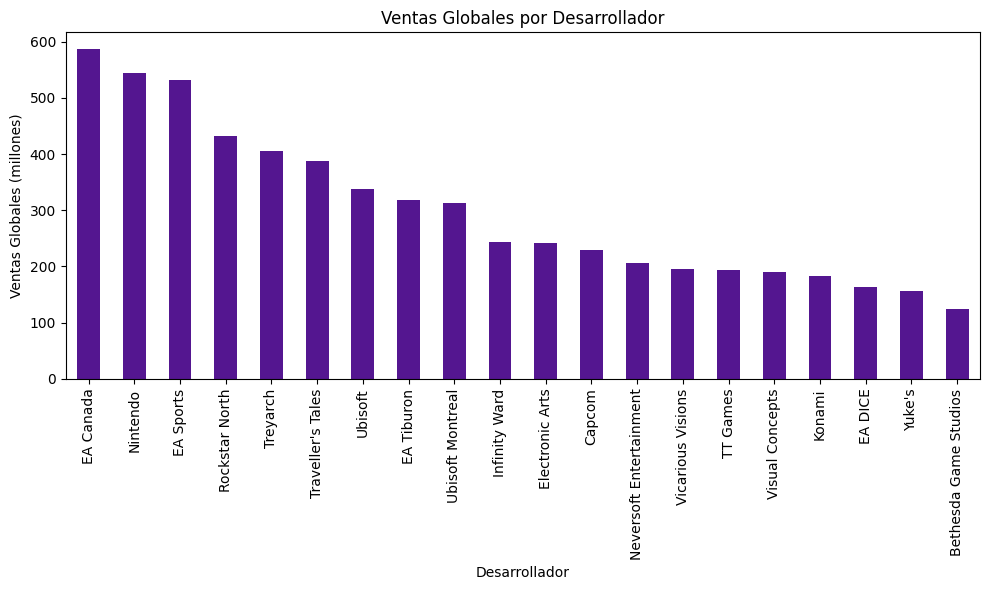

In [405]:
grouped_sales = Final.groupby('Developer')['Global_Sales'].sum()
grouped_sales = grouped_sales.sort_values(ascending=False).head(20)

colors = ['#541690']


# Create the bar chart

plt.figure(figsize=(10, 6))
grouped_sales.plot(kind='bar', color=[colors[i % len(colors)] for i in range(len(grouped_sales))])

# Añadir títulos y etiquetas
plt.title('Ventas Globales por Desarrollador')
plt.xlabel('Desarrollador')
plt.ylabel('Ventas Globales (millones)')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

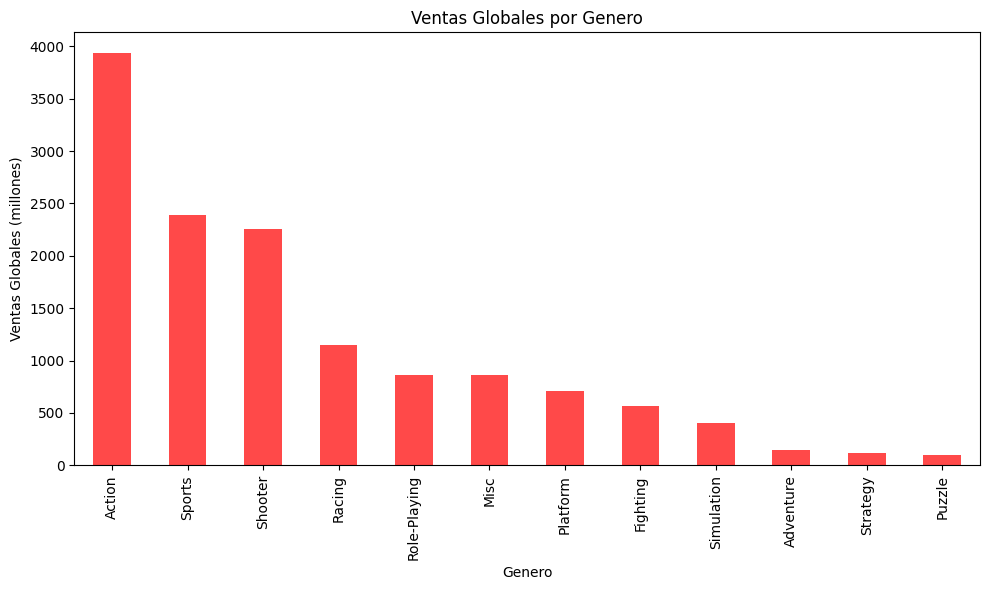

In [406]:
grouped_sales = Final.groupby('Genre')['Global_Sales'].sum()
grouped_sales = grouped_sales.sort_values(ascending=False).head(20)

# Crear el gráfico
plt.figure(figsize=(10, 6))
grouped_sales.plot(kind='bar', color='#FF4949')

# Añadir títulos y etiquetas
plt.title('Ventas Globales por Genero')
plt.xlabel('Genero')
plt.ylabel('Ventas Globales (millones)')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

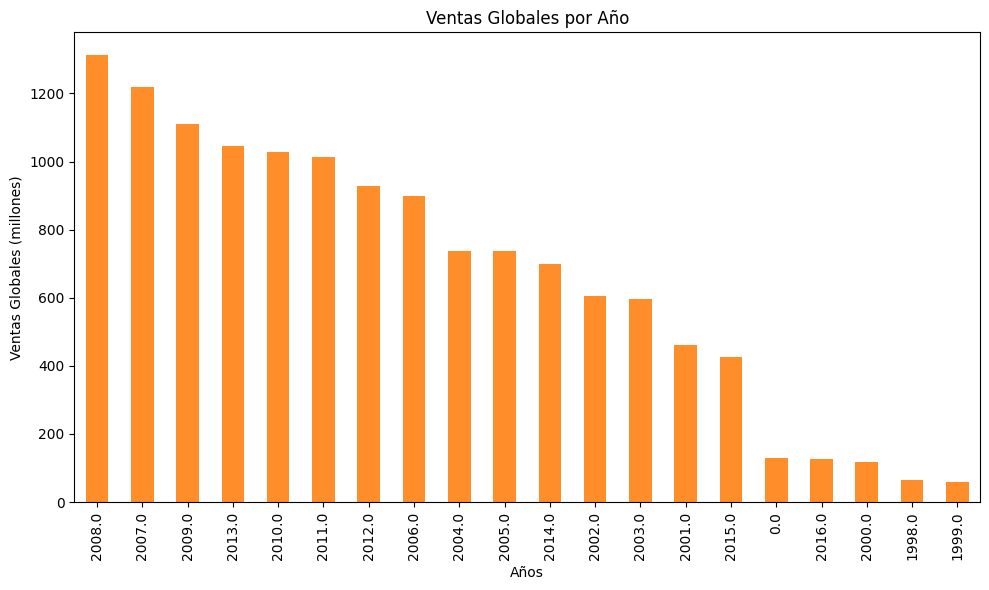

In [407]:
grouped_sales = Final.groupby('Year')['Global_Sales'].sum()
grouped_sales = grouped_sales.sort_values(ascending=False).head(20)

# Crear el gráfico
plt.figure(figsize=(10, 6))
grouped_sales.plot(kind='bar', color='#FF8D29')

# Añadir títulos y etiquetas
plt.title('Ventas Globales por Año')
plt.xlabel('Años')
plt.ylabel('Ventas Globales (millones)')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

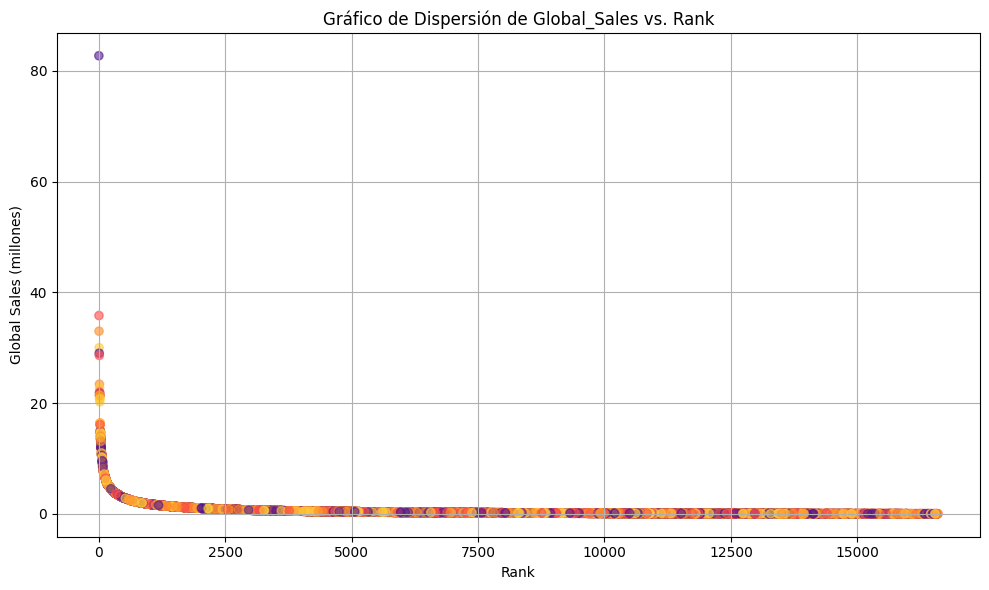

In [408]:
# Asegúrate de que 'Rank' y 'Global_Sales' son numéricos

Final['Rank'] = pd.to_numeric(Final['Rank'], errors='coerce')

Final['Global_Sales'] = pd.to_numeric(Final['Global_Sales'], errors='coerce')


# Eliminar filas con NaN en las columnas relevantes (opcional)

Final = Final.dropna(subset=['Rank', 'Global_Sales'])


# Define the colors to use

colors = ['#541690', '#FF4949', '#FF8D29', '#FFCD38']


# Crear el gráfico de dispersión

plt.figure(figsize=(10, 6))

plt.scatter(Final['Rank'], Final['Global_Sales'], alpha=0.6,

            c=[colors[i % len(colors)] for i in range(len(Final))])  # Cycle through colors


# Añadir títulos y etiquetas

plt.title('Gráfico de Dispersión de Global_Sales vs. Rank')

plt.xlabel('Rank')

plt.ylabel('Global Sales (millones)')


# Mostrar el gráfico

plt.grid(True)

plt.tight_layout()

plt.show()

## Creando los modelos

Al intentar medir el éxito de un videojuego se tomará como indicador de éxito la cantidad de ventas realizadas a nivel global. Para esto se dividirá la muestra en 5 quintiles de ventas y la misión de los modelos de clasificación será lograr predecir el quintil al cual pertenece según distintos datos.

Por otro lado, se ajustará un modelo de regresión lineal que intente predecir el logaritmo de las ventas globales para poder entender que factores contribuyen para el aumento de las ventas de un videojuego y cuales disminuyen las mismas.

El análisis se dividirá además en 2 conjuntos de variables. En el primer conjunto de datos se intetará ajustar los modelos sin tener ninguna información acerca de las ventas del videojuego. Esto quiere decir que se utilizarán solamente variables propias del videojuego, como pueden ser plataforma, desarrolladora, calificación de los usuarios y calificación de la crítica enter otras.

En el segundo análisis se repetirá el proceso pero agregando una variable. Esta variable extra corresponde a la venta del videojuego en un continente. Esto introduce información extra que ayuda a mejorar las predicciones pero para obtener esta información se debió  realizar un lanzamiento del videojuego de forma parcial.

#### Preparando el DataSet

In [409]:
# Recuperemos todos las columnas no númericas

Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17436 entries, 0 to 17435
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          17436 non-null  object 
 1   Critic_Score  17436 non-null  float64
 2   Critic_Count  17436 non-null  float64
 3   User_Score    17436 non-null  object 
 4   User_Count    17436 non-null  float64
 5   Developer     17436 non-null  object 
 6   Rating        17436 non-null  object 
 7   Rank          17436 non-null  int64  
 8   Platform      17436 non-null  object 
 9   Year          17436 non-null  float64
 10  Genre         17436 non-null  object 
 11  Publisher     17436 non-null  object 
 12  NA_Sales      17436 non-null  float64
 13  EU_Sales      17436 non-null  float64
 14  JP_Sales      17436 non-null  float64
 15  Other_Sales   17436 non-null  float64
 16  Global_Sales  17436 non-null  float64
dtypes: float64(9), int64(1), object(7)
memory usage: 2.3+ MB


In [410]:
#Drop todas las columnas que se repiten información
#Final = Final.drop(columns=['NA_Sales', 'EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales'])
df_con_ventas = Final
Final = Final.drop(columns=['EU_Sales', 'JP_Sales', 'Other_Sales', "NA_Sales"])

Final

,Name,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rank,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,76.0,51.0,8,322.0,Nintendo,E,1,Wii,2006.0,Sports,Nintendo,82.74
1,Mario Kart Wii,82.0,73.0,8.3,709.0,Nintendo,E,3,Wii,2008.0,Racing,Nintendo,35.82
2,Wii Sports Resort,80.0,73.0,8,192.0,Nintendo,E,4,Wii,2009.0,Sports,Nintendo,33.00
3,New Super Mario Bros.,89.0,65.0,8.5,431.0,Nintendo,E,7,DS,2006.0,Platform,Nintendo,30.01
4,Wii Play,58.0,41.0,6.6,129.0,Nintendo,E,8,Wii,2006.0,Misc,Nintendo,29.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17431,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,3267,PS3,2014.0,Action,Konami Digital Entertainment,0.62
17432,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,6120,XOne,2014.0,Action,Konami Digital Entertainment,0.28
17433,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,8755,X360,2014.0,Action,Konami Digital Entertainment,0.15
17434,Breach,61.0,12.0,5.8,43.0,Atomic Games,T,16588,PC,2011.0,Shooter,Destineer,0.01


In [411]:
# Recuperemos todos las columnas no númericas
object_columns = Final.select_dtypes(include=['object']).columns
object_columns
columnas_no_numericas = {}

for index in object_columns:
    columnas_no_numericas[index] = list(Final[index])

text = 'Los valores no númericos son: '

for value in columnas_no_numericas.keys():
    if value != 'Publisher':
        text += f"{value}, "
    else:
        text += f"y {value}"
print(text)

Los valores no númericos son: Name, User_Score, Developer, Rating, Platform, Genre, y Publisher


In [412]:
# Nos saltaremos los nombres porque no afecta a la predicción

# Volvemos Los User_Score y rating a númerico
Final['User_Score'] = pd.to_numeric(Final['User_Score'], errors='coerce')  # Convert to float, coercing errors to NaN
Final['User_Score'] = Final['User_Score'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int

Final['Rating'] = pd.to_numeric(Final['User_Score'], errors='coerce')  # Convert to float, coercing errors to NaN
Final['Rating'] = Final['User_Score'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int

#Creamos dummies para los valores que se pueden cuantificar.
# #Platform, Genre
Year_dummies = pd.get_dummies(Final['Year'], prefix='Year', drop_first=True)
Plat_dummies = pd.get_dummies(Final['Platform'], prefix='Platform', drop_first=True)
Gen_dummies = pd.get_dummies(Final['Genre'], prefix='Genre', drop_first=True)

Publisher_dummies = pd.get_dummies(Final['Publisher'], prefix='Publisher', drop_first=True)
Developer_dummies = pd.get_dummies(Final['Developer'], prefix='Developer', drop_first=True)




Final_with_dummies = pd.concat([Final, Plat_dummies, Gen_dummies, Year_dummies], axis=1)
Final_with_dummies = Final_with_dummies.drop(columns=['Name','Developer', 'Platform', 'Genre', 'Publisher', "Year"])
Final_with_dummies[Final_with_dummies.select_dtypes(include=['bool']).columns] = Final_with_dummies.select_dtypes(include=['bool']).astype(int)
Final_with_dummies
Final = Final_with_dummies
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17436 entries, 0 to 17435
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Critic_Score        17436 non-null  float64
 1   Critic_Count        17436 non-null  float64
 2   User_Score          17436 non-null  int64  
 3   User_Count          17436 non-null  float64
 4   Rating              17436 non-null  int64  
 5   Rank                17436 non-null  int64  
 6   Global_Sales        17436 non-null  float64
 7   Platform_3DS        17436 non-null  int64  
 8   Platform_DC         17436 non-null  int64  
 9   Platform_DS         17436 non-null  int64  
 10  Platform_GB         17436 non-null  int64  
 11  Platform_GBA        17436 non-null  int64  
 12  Platform_GC         17436 non-null  int64  
 13  Platform_GEN        17436 non-null  int64  
 14  Platform_N64        17436 non-null  int64  
 15  Platform_NES        17436 non-null  int64  
 16  Plat

In [413]:
X = Final.drop(columns=['Global_Sales'])
X = X.drop(columns=['Rank']) #Es el ranking de cuanto ha vendido, no es conveniente en el análisis
y = Final['Global_Sales']

In [414]:
# Suponiendo que tienes X y y ya definidos

# Estandarizamos X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculamos los deciles
deciles = pd.qcut(y, q=5, labels=False)  # Genera índices de 0 a 9 para los deciles

# Ajustamos las etiquetas para que representen los deciles
y_discrete = deciles + 1  # Para tener etiquetas de 1 a 10 en lugar de 0 a 9

# Opcional: conviertes a entero explícitamente si es necesario
y_discrete = y_discrete.astype(int)

# Mostrar los valores transformados
print(y_discrete)

0        5
1        5
2        5
3        5
4        5
        ..
17431    4
17432    3
17433    2
17434    1
17435    1
Name: Global_Sales, Length: 17436, dtype: int64


#### Seleccionando el modelo

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_discrete, test_size=0.25, random_state=99)

#Esta función nos entrega la información del desempeño de un modelo. será utilizada par avaluar los distintos modelos.
def probar_modelo(modelo, nombre_modelo):
    modelo.fit(X_train, y_train)
    predichos = modelo.predict(X_test)
    reporte = classification_report(y_test, predichos)
    cros_val = cross_val_score(modelo, X_scaled, y_discrete)
    print(f"Usando {nombre_modelo}:\n{reporte}\nCross-Validation Score:{np.mean(cros_val):.3f}")
    return modelo


## Parte 1

In [416]:
# Regresion logística 
regr = probar_modelo(LogisticRegression(max_iter=500), "Regresión logística")

Usando Regresión logística:
              precision    recall  f1-score   support

           1       0.53      0.58      0.55       916
           2       0.31      0.33      0.32       863
           3       0.25      0.20      0.22       838
           4       0.30      0.22      0.25       822
           5       0.49      0.62      0.55       920

    accuracy                           0.40      4359
   macro avg       0.38      0.39      0.38      4359
weighted avg       0.38      0.40      0.39      4359

Cross-Validation Score:0.379


In [417]:
# Clasificador KNN
KNN = probar_modelo(KNeighborsClassifier(), "Clasificador KNN")

Usando Clasificador KNN:
              precision    recall  f1-score   support

           1       0.53      0.60      0.56       916
           2       0.38      0.42      0.40       863
           3       0.39      0.36      0.37       838
           4       0.37      0.39      0.38       822
           5       0.60      0.47      0.52       920

    accuracy                           0.45      4359
   macro avg       0.45      0.45      0.45      4359
weighted avg       0.46      0.45      0.45      4359

Cross-Validation Score:0.444


In [418]:
# Arbol de decision
arbol_decision = probar_modelo(DecisionTreeClassifier(), "Arbol de decision")

Usando Arbol de decision:
              precision    recall  f1-score   support

           1       0.57      0.51      0.54       916
           2       0.34      0.36      0.35       863
           3       0.32      0.33      0.33       838
           4       0.32      0.34      0.33       822
           5       0.53      0.52      0.52       920

    accuracy                           0.42      4359
   macro avg       0.42      0.41      0.41      4359
weighted avg       0.42      0.42      0.42      4359

Cross-Validation Score:0.323


In [419]:
# Random Forest
random_forest = probar_modelo(RandomForestClassifier(), "Random Forest")

Usando Random Forest:
              precision    recall  f1-score   support

           1       0.63      0.62      0.63       916
           2       0.45      0.47      0.46       863
           3       0.47      0.40      0.43       838
           4       0.45      0.47      0.46       822
           5       0.63      0.68      0.66       920

    accuracy                           0.53      4359
   macro avg       0.53      0.53      0.53      4359
weighted avg       0.53      0.53      0.53      4359

Cross-Validation Score:0.438


De entre todos los modelo evaluados el que mejor desempeño presenta es el random forest, ya que su desempeño es ligeramente inferior al presentado por el clasificador KNN en terminos de precision en las validaciones curzadas, pero con un mejor resultados para recall y F1 score.

Independiente de esto, podemos ver que la precision en las validaciones cruzadas fue de 0.43% lo cual es inidicio de un mal desempeño del clasificador ya que una elección aleatoria tendría un deseméño de 20%. Esto es un indicador de que la información que se les está entregando a los modelos es insuficiente para predecir el quintil al cual pertenece un videojuego.

In [420]:



feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': random_forest.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

         feature  importance
3     User_Count    0.166878
0   Critic_Score    0.161063
1   Critic_Count    0.147223
2     User_Score    0.052363
4         Rating    0.051482
..           ...         ...
39   Year_1980.0    0.000050
41   Year_1982.0    0.000040
40   Year_1981.0    0.000027
43   Year_1988.0    0.000017
45   Year_1990.0    0.000000

[71 rows x 2 columns]


Podemos ver que dentro de la relevancia del random forest, los indicadores a los cuales se les da más relevancia son la cantidad de usuarios, la puntuación de las críticas por parte de los especialista y finalmente la cantidad de críticas.

### Regresion Lineal

In [421]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Suponemos que X es un DataFrame con nombres de columnas
regresion = LinearRegression()


#X["NA_Sales"] = np.log(X["NA_Sales"] + 1)

# Ajustamos la regresión
regresion.fit(X, np.log(Final["Global_Sales"] + 1))



# Calculamos el R^2
y_pred = regresion.predict(X)
r2 = r2_score(np.log(Final["Global_Sales"] + 1), y_pred)
print(f"R^2: {r2:.4f}")

R^2: 0.3326


Podemos ver que al ajustar una regresión la cual intente predecir el valor del logaritmo de las ventas se consigue explicar el 0.33 de la variabilidad natural de los datos. Esto es un nuevo indicativo de que la información proporcionada no es suficiente para predecir las ventas del videojuego.

## Parte 2

Agregamos la información adicional de las ventas de un continente

In [422]:
nombres = X.columns
X = pd.DataFrame(X_scaled)

X.columns = nombres

X["EU_Sales"] = pd.to_numeric(df_con_ventas['EU_Sales'], errors='coerce')

# Estandarizamos X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_discrete, test_size=0.25, random_state=99)


In [423]:
regr = probar_modelo(LogisticRegression(max_iter=500), "Regresión logística")

Usando Regresión logística:
              precision    recall  f1-score   support

           1       0.73      0.74      0.74       916
           2       0.50      0.59      0.54       863
           3       0.48      0.46      0.47       838
           4       0.55      0.52      0.54       822
           5       0.84      0.77      0.80       920

    accuracy                           0.62      4359
   macro avg       0.62      0.62      0.62      4359
weighted avg       0.63      0.62      0.62      4359

Cross-Validation Score:0.602


In [424]:
KNN = probar_modelo(KNeighborsClassifier(), "Clasificador KNN")

Usando Clasificador KNN:
              precision    recall  f1-score   support

           1       0.53      0.60      0.57       916
           2       0.39      0.45      0.42       863
           3       0.39      0.38      0.39       838
           4       0.40      0.41      0.41       822
           5       0.75      0.55      0.63       920

    accuracy                           0.48      4359
   macro avg       0.49      0.48      0.48      4359
weighted avg       0.50      0.48      0.49      4359

Cross-Validation Score:0.475


In [425]:
arbol_decision = probar_modelo(DecisionTreeClassifier(), "Arbol de decision")

Usando Arbol de decision:
              precision    recall  f1-score   support

           1       0.82      0.79      0.80       916
           2       0.71      0.71      0.71       863
           3       0.71      0.74      0.72       838
           4       0.77      0.79      0.78       822
           5       0.91      0.88      0.89       920

    accuracy                           0.78      4359
   macro avg       0.78      0.78      0.78      4359
weighted avg       0.78      0.78      0.78      4359

Cross-Validation Score:0.729


In [426]:
random_forest = probar_modelo(RandomForestClassifier(), "Random Forest")

Usando Random Forest:
              precision    recall  f1-score   support

           1       0.85      0.82      0.83       916
           2       0.69      0.78      0.73       863
           3       0.75      0.74      0.74       838
           4       0.79      0.78      0.78       822
           5       0.92      0.86      0.89       920

    accuracy                           0.80      4359
   macro avg       0.80      0.80      0.80      4359
weighted avg       0.80      0.80      0.80      4359

Cross-Validation Score:0.747


Podemos ver que adicionar la información de ventas dentro de Europa mejora considerablemente los resultados del modelo. Consiguiendo un máximo de 0.747 de precisión en cross-validation con el modelo de Random_Forest.

Esto indica que la información de venta en un sector proporciona información suficiente para los modelos de clasificación para determinar el quintil al cual pertenece cierto dato. Consiguiendo un mejor desempeño en los quintiles extremos pero un buen ajuste también en los quintiles centrales.

In [427]:

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': random_forest.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

         feature  importance
71      EU_Sales    0.334032
0   Critic_Score    0.096969
3     User_Count    0.095257
1   Critic_Count    0.084265
4         Rating    0.034615
..           ...         ...
46   Year_1991.0    0.000045
40   Year_1981.0    0.000036
8    Platform_GB    0.000034
43   Year_1988.0    0.000005
45   Year_1990.0    0.000000

[72 rows x 2 columns]


Podemos ver que la columna de mayor relevancia para el random forest son las ventas en europa, mientras que por detras se encuentra la valoración de la crítica especializada, la cantidad de usuarios y la cantidad de criticas que tiene el juego.

### Regresion lineal

In [428]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Suponemos que X es un DataFrame con nombres de columnas
regresion = LinearRegression()


X["EU_Sales"] = np.log(X["EU_Sales"] + 1)

# Ajustamos la regresión
regresion.fit(X, np.log(Final["Global_Sales"] + 1))



# Calculamos el R^2
y_pred = regresion.predict(X)
r2 = r2_score(np.log(Final["Global_Sales"] + 1), y_pred)
print(f"R^2: {r2:.4f}")

R^2: 0.8219


In [432]:
# Obtenemos los coeficientes y los nombres de las columnas
coeficientes = regresion.coef_
nombres_columnas = X.columns

# Separamos los coeficientes positivos y negativos con los nombres de las columnas
coef_positivos = [(nombre, coef) for nombre, coef in zip(nombres_columnas, coeficientes) if coef > 0]
coef_negativos = [(nombre, coef) for nombre, coef in zip(nombres_columnas, coeficientes) if coef < 0]

# Imprimimos las listas de coeficientes
print("Coeficientes positivos:")
print([a[0] for a in coef_positivos])

print("\nCoeficientes negativos:")
print([a[0] for a in coef_negativos])

# Calculamos el R^2
y_pred = regresion.predict(X)
r2 = r2_score(np.log(Final["Global_Sales"] + 1), y_pred)
print(f"\nR^2: {r2:.4f}")

Coeficientes positivos:
['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Genre_Fighting', 'Genre_Misc', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Sports', 'Year_1989.0', 'Year_1990.0', 'Year_1991.0', 'Year_1992.0', 'Year_1994.0', 'Year_1996.0', 'Year_1997.0', 'Year_1998.0', 'Year_1999.0', 'Year_2001.0', 'Year_2006.0', 'Year_2007.0', 'Year_2008.0', 'EU_Sales']

Coeficientes negativos:
['Rating', 'Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GB', 'Platform_GBA', 'Platform_GC', 'Platform_GEN', 'Platform_N64', 'Platform_NES', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_SAT', 'Platform_SNES', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Adventure', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Simulation', 'Genre_Strategy', 'Year_1980.0', 'Year_1981.0', 'Year_1982.0', 'Year_1985.0', 'Year_1988.0', 'Year_1995.0', 'Year_2000.0', 'Year_20

Podemos ver que además la regresion lineal tiene un mejor desempeño al añadir el dato de las ventas en Europa. Logrando explicar el 82% de la variabilidad de los datos. Mejorando considerablemente el ajuste del modelo.

### Coeficientes

In [429]:
# Obtenemos los coeficientes
coeficientes = regresion.coef_

# Separamos los coeficientes positivos y negativos
coef_positivos = [coef for coef in coeficientes if coef > 0]
coef_negativos = [coef for coef in coeficientes if coef < 0]

# Imprimimos las listas de coeficientes
print("Coeficientes positivos:", coef_positivos)
print("Coeficientes negativos:", coef_negativos)

Coeficientes positivos: [np.float64(0.05102392819653521), np.float64(0.014743917198415932), np.float64(243041793630.5186), np.float64(0.007612651891783728), np.float64(0.0088351810755367), np.float64(0.010146429527817885), np.float64(0.0064697265625), np.float64(0.00115966796875), np.float64(0.00740814208984375), np.float64(0.00640869140625), np.float64(0.0003814697265625), np.float64(0.001953125), np.float64(0.000732421875), np.float64(0.004150390625), np.float64(0.005859375), np.float64(0.009521484375), np.float64(0.005859375), np.float64(0.00177001953125), np.float64(0.00048828125), np.float64(0.002685546875), np.float64(0.004302978515625), np.float64(0.003173828125), np.float64(1.3875732421875)]
Coeficientes negativos: [np.float64(-243041793630.52734), np.float64(-795269068155.2777), np.float64(-191417166380.50696), np.float64(-1442942206303.4792), np.float64(-131780143715.27383), np.float64(-1076088822679.6929), np.float64(-1348377286560.5046), np.float64(-131780143715.26633), np.

# Conclusión
